In [2]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from math import sin, cos, sqrt, atan2, radians
import warnings

In [6]:
## Import API key
from api_keys import g_key
## configure the gmaps key
gmaps.configure(api_key=g_key)

In [4]:
binnedPop = pd.read_csv('../Data/binnedPop.csv')
binnedPop.head()

,Unnamed: 0,"Distance from Arkansas Nuclear One, Unit 1",Distance from Beaver Valley Power Station 1,Distance from Braidwood Station 1,Distance from Browns Ferry Nuclear Plant 1,Distance from Brunswick Steam Electric Plant 1,Distance from Byron Station 1,Distance from Callaway Plant 1,Distance from Calvert Cliffs Nuclear Power Plant 1,Distance from Catawba Nuclear Station 1,...,Distance from Summer,Distance from Surry 1,Distance from Susquehanna 1,Distance from Turkey Point 3,Distance from Vogtle 1,Distance from Waterford 3,Distance from Watts Bar 1,Distance from Wolf Creek 1,Mean Pop,StDev
0,0,2850,12763,21041,45865,16126,11207,22437,44300,30670,...,731,3484,22906,155195,13966,51920,8855,4007,39678.438596,52496.103698
1,1,64692,190311,36326,51846,20897,71842,9839,45704,89762,...,6968,49638,47713,117302,2109,41741,7556,1574,84794.105263,96776.410066
2,2,22898,194242,41035,146552,52156,195884,17636,57885,223810,...,103255,163567,81992,404485,45019,174409,66661,5056,136450.280702,143332.911431
3,3,20356,435755,245765,186611,164673,169074,200485,67225,316042,...,202879,229809,188896,470243,92880,400116,117202,6701,229884.526316,261525.414130
4,4,25134,724334,279721,166061,50452,164420,66669,112863,606648,...,382743,308933,343821,711605,229574,400796,71702,53085,338885.894737,523007.705703


Text(0, 0.5, 'Population')

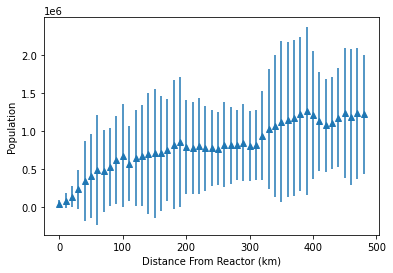

In [5]:
theEdges = np.arange(0, 500, 10)
edgesForPlot = theEdges[:-1]
# plt.plot(edgesForPlot, binnedPop['Mean Pop'])
plt.errorbar(edgesForPlot, binnedPop['Mean Pop'], binnedPop['StDev'], linestyle='None', marker='^')
plt.xlabel("Distance From Reactor (km)")
plt.ylabel("Population")

In [11]:
plantPop = pd.read_csv('../Data/plantPop_noDuplicates.csv')
plantPop.head(2)

,Unnamed: 0,Zip,City,State,Latitude,Longitude,2010 Census Population,"Distance from Arkansas Nuclear One, Unit 1",Distance from Beaver Valley Power Station 1,Distance from Braidwood Station 1,...,Distance from Sequoyah 1,Distance from South Texas 1,Distance from Summer,Distance from Surry 1,Distance from Susquehanna 1,Distance from Turkey Point 3,Distance from Vogtle 1,Distance from Waterford 3,Distance from Watts Bar 1,Distance from Wolf Creek 1
0,0,5769,Salisbury,VT,43.914026,-73.10703,1216,1964.516138,703.791569,1275.062906,...,1413.202932,2619.275755,1278.988498,816.682053,655.662688,2157.290611,1430.107582,2177.150254,1355.830978,1994.970315
1,1,1085,Westfield,MA,42.133642,-72.75029,41117,1926.478786,661.448479,1290.960391,...,1322.663768,2546.519449,1144.984973,656.426400,635.033811,1984.280764,1293.831261,2080.818508,1267.610472,1996.520992


In [8]:
cols = plantPop.columns
colsDF = pd.DataFrame(cols)
thePlantNames = colsDF.loc[7:len(cols)]
thePlantNames.head(3)

,0
7,"Distance from Arkansas Nuclear One, Unit 1"
8,Distance from Beaver Valley Power Station 1
9,Distance from Braidwood Station 1


In [40]:
plantName = 'Distance from Arkansas Nuclear One, Unit 1'
onePlant = pd.DataFrame(plantPop[[plantName, 'Latitude', 'Longitude', '2010 Census Population']])

onePlant.sort_values(by= [plantName],  inplace=True)
nearPops = onePlant[(onePlant[plantName] <= 100)]
nearPops.head()

,"Distance from Arkansas Nuclear One, Unit 1",Latitude,Longitude,2010 Census Population
16495,6.513935,35.380528,-93.28528,2850
31050,10.355282,35.299773,-93.35469,923
9999,11.197992,35.376739,-93.35706,1216
7511,11.592383,35.278429,-93.13682,18685
30417,12.768701,35.308848,-93.10909,20973


In [46]:
locations = nearPops[["Latitude", "Longitude"]]
pops = nearPops['2010 Census Population'].values
# pops

In [44]:
## Make map figure
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=pops, dissipating=False,  point_radius=1)

# Add the humidity heat layer to the fig
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))